In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelAR03')

# Check its architecture
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_71 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_72 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_73 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_74 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_75 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_76 (Dense)             (None, 1)               

In [2]:
df = pd.read_csv("C:/Users/yanzh/Desktop/AR03.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.16
chlorophylla_max = 14.83
time_min = 34710
time_max = 44356.3680555556

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min

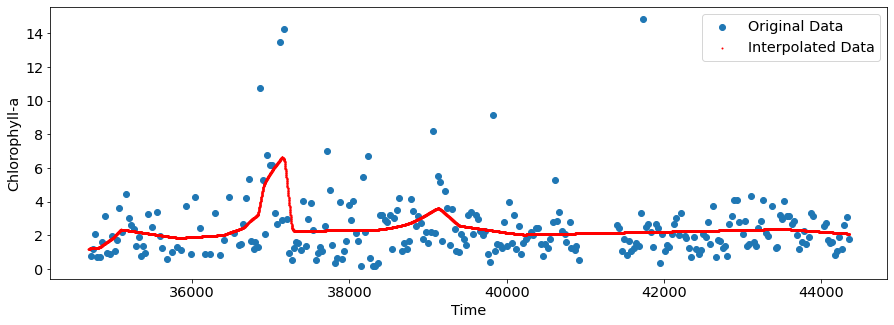

In [3]:
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()

In [4]:
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)
interpolation = model.predict([0.043747035
,0.078682463
,0.084798755
,0.097446002
,0.103769625
,0.110093249
,0.116520538
,0.12263683
,0.128960454
,0.135284077
,0.141607701
,0.147931324
,0.154358614
,0.160474905
,0.166798529
,0.173122152
,0.179445776
,0.185769399
,0.192196689
,0.646564589
,0.649570902
,0.652784547
,0.655894526
,0.65910817
,0.662218149
,0.665431794
,0.668645439
,0.671755417
,0.674969062
,0.678079041
,0.681292686
,0.68450633
,0.687408977
,0.690622622
,0.895777556
,0.95569648
,0.958806459
,0.962020104
])
interpolation

313/313 [==============================] - 0s 362us/step - loss: 9.2559e-17
['loss']


array([[0.14807382],
       [0.13203192],
       [0.1292234 ],
       [0.12341592],
       [0.12054612],
       [0.11786986],
       [0.11685564],
       [0.11675259],
       [0.11783377],
       [0.11903564],
       [0.12023749],
       [0.12143936],
       [0.12267871],
       [0.12399022],
       [0.12534617],
       [0.12692076],
       [0.13247839],
       [0.13994083],
       [0.14640495],
       [0.13382322],
       [0.13401225],
       [0.13421434],
       [0.13440989],
       [0.13461196],
       [0.13480753],
       [0.13500959],
       [0.13521168],
       [0.13540724],
       [0.13560931],
       [0.13580486],
       [0.13600695],
       [0.13620904],
       [0.13639155],
       [0.13659364],
       [0.15011871],
       [0.14228371],
       [0.14159773],
       [0.1408889 ]], dtype=float32)